In [21]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger



Using TensorFlow backend.


In [4]:
data = pd.read_csv('KDDTrain+.txt', sep=",", header=None)
data.head()

0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]

In [6]:
data.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]
data.head()

Duration Protocol_type   Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   Wrong_fragment  Urgent  Hot  ...  Dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   Dst_host_diff_srv_rate  Dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   Dst_host_srv_diff_host_rate  Dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   Dst_host_srv_serror_rate  Dst_host_rerror_rate  Dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    label1  label2  
0   normal      20  
1   normal      15  
2  neptune      19  
3   normal      21  
4   normal      21  

[5 rows x 43 columns]

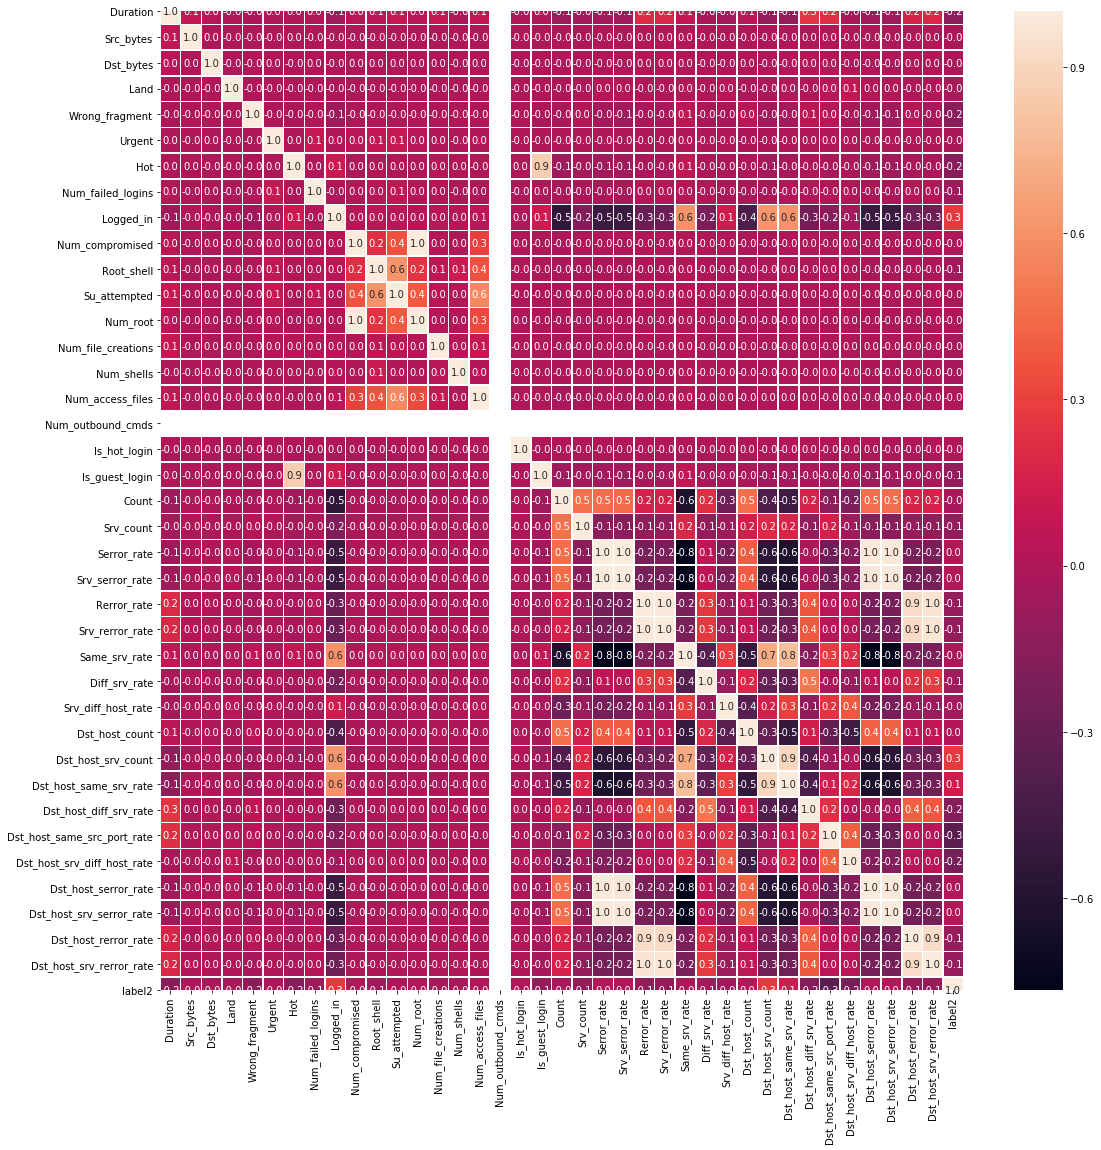

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
KDDTrain=pd.read_csv('KDDTrain+.txt', sep=",", header=None)
KDDTest= pd.read_csv('KDDTest+.txt', sep=",", header=None)


KDDTrain.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]
KDDTest.columns = ["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment",
                "Urgent", "Hot", "Num_failed_logins", "Logged_in", "Num_compromised", "Root_shell", "Su_attempted", 
                "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login",
                "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", 
                "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", 
                "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", 
                "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate",
                "Dst_host_srv_rerror_rate","label1", "label2"]

In [17]:
KDDTest.head()

Duration Protocol_type   Service  Flag  Src_bytes  Dst_bytes  Land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   Wrong_fragment  Urgent  Hot  ...  Dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   Dst_host_diff_srv_rate  Dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   Dst_host_srv_diff_host_rate  Dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   Dst_host_srv_serror_rate  Dst_host_rerror_rate  Dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

    label1  label2  
0  neptune      21  
1  neptune      21  
2   normal      21  
3    saint      15  
4    mscan      11  

[5 rows x 43 columns]

In [32]:
X = KDDTrain.iloc[:,0:41]
Y = KDDTrain.iloc[:,41:43]
Y.head()

label1  label2
0   normal      20
1   normal      15
2  neptune      19
3   normal      21
4   normal      21